# ABSA Results: Aspect Analysis
### BTT Cadence 2B

This notebook demonstrates how to analyze individual product aspects in detail.
Use this as a template for building aspect-specific views in the dashboard.

# Installations & Imports


In [1]:
# Numerical computing and data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Display settings
pd.set_option('display.max_colwidth', 180)
sns.set_style("whitegrid")

# Constants
SEED = 42

# Data Loading

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Cadence2B/absa_results/

aspect_sentiments.csv  aspect_summary.csv


In [5]:
# Load processed ABSA results
aspects_df = pd.read_csv('/content/drive/MyDrive/Cadence2B/dashboard_data/aspect_sentiments.csv')
summary_df = pd.read_csv('/content/drive/MyDrive/Cadence2B/dashboard_data/aspect_summary.csv')

print(f"Loaded {len(aspects_df):,} aspect-sentiment pairs")
print(f"Loaded {len(summary_df):,} unique aspects\n")

Loaded 918,167 aspect-sentiment pairs
Loaded 93,033 unique aspects



# Aspect Analysis

Analyze any single aspect deeply.

In [6]:
def analyze_aspect(aspect_name, aspects_df, show_examples=True, n_examples=3):
    '''
    Perform comprehensive analysis on a single product aspect.

    Parameters:
        aspect_name: Name of the aspect to analyze (e.g., 'battery', 'camera')
        aspects_df: Full aspect-sentiment DataFrame
        show_examples: Whether to display example reviews
        n_examples: Number of example reviews per sentiment

    Returns:
        dict: Analysis results including sentiment breakdown and statistics
    '''

    # Filter data for this aspect
    aspect_data = aspects_df[aspects_df['aspect'] == aspect_name].copy()

    if len(aspect_data) == 0:
        print(f"(X) No data found for aspect: '{aspect_name}'")
        return None

    # Display header
    print("\n" + "=" * 80)
    print(f"ANALYSIS: {aspect_name.upper()}")
    print("=" * 80)

    # Overall statistics
    print(f"\nTotal Mentions: {len(aspect_data):,}")

    if 'review_id' in aspect_data.columns:
        print(f"Unique Reviews: {aspect_data['review_id'].nunique():,}")

    # Sentiment breakdown
    print(f"\nSentiment Distribution:")
    sentiment_counts = aspect_data['sentiment'].value_counts()
    total = len(aspect_data)

    results = {'aspect': aspect_name, 'total': total}

    for sentiment in ['positive', 'neutral', 'negative']:
        count = sentiment_counts.get(sentiment, 0)
        percentage = (count / total) * 100
        print(f"  {sentiment.capitalize():<10}: {count:>6,} ({percentage:>5.1f}%)")
        results[sentiment] = count
        results[f'{sentiment}_pct'] = percentage

    # Sentiment ratio (positive - negative)
    pos_count = sentiment_counts.get('positive', 0)
    neg_count = sentiment_counts.get('negative', 0)
    sentiment_ratio = pos_count / neg_count if neg_count > 0 else float('inf')
    print(f"\nPositive-to-Negative Ratio: {sentiment_ratio:.2f}")
    results['pos_neg_ratio'] = sentiment_ratio

    # Show example reviews
    if show_examples:
        print(f"\n{'─' * 80}")
        print("EXAMPLE REVIEWS")
        print('─' * 80)

        for sentiment in ['positive', 'negative', 'neutral']:
            sentiment_data = aspect_data[aspect_data['sentiment'] == sentiment]

            if len(sentiment_data) > 0:
                print(f"\n{sentiment.upper()} Examples:")
                examples = sentiment_data.sample(min(n_examples, len(sentiment_data)), random_state=SEED)

                for i, (idx, row) in enumerate(examples.iterrows(), 1):
                    print(f"\n  {i}. {row['text'][:200]}...")

    print("\n" + "=" * 80 + "\n")

    return results

# Visualize Aspect Sentiment

In [7]:
def plot_aspect_sentiment(aspect_name, aspects_df):
    '''
    Create a stacked bar chart showing sentiment breakdown for an aspect.

    Parameters:
        aspect_name: Name of aspect to visualize
        aspects_df: Full aspect-sentiment DataFrame
    '''

    aspect_data = aspects_df[aspects_df['aspect'] == aspect_name]

    if len(aspect_data) == 0:
        print(f"No data for aspect: {aspect_name}")
        return

    sentiment_counts = aspect_data['sentiment'].value_counts()

    # Color mapping
    colors = {
        'positive': '#2ecc71',
        'neutral': '#95a5a6',
        'negative': '#e74c3c'
    }

    # Create horizontal stacked bar
    fig, ax = plt.subplots(figsize=(12, 3))

    left = 0
    for sentiment in ['positive', 'neutral', 'negative']:
        count = sentiment_counts.get(sentiment, 0)
        percentage = (count / len(aspect_data)) * 100

        ax.barh(0, count, left=left, color=colors[sentiment],
                label=f'{sentiment.capitalize()}: {count:,} ({percentage:.1f}%)')
        left += count

    ax.set_yticks([])
    ax.set_xlabel('Number of Mentions', fontsize=12)
    ax.set_title(f'Sentiment Distribution: {aspect_name}', fontsize=14, fontweight='bold')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.tight_layout()
    plt.show()

# Analyze Top Aspects

TOP 10 ASPECTS - DETAILED ANALYSIS

ANALYSIS: SOUND

Total Mentions: 9,259
Unique Reviews: 8,779

Sentiment Distribution:
  Positive  :  3,918 ( 42.3%)
  Neutral   :  2,205 ( 23.8%)
  Negative  :  3,136 ( 33.9%)

Positive-to-Negative Ratio: 1.25




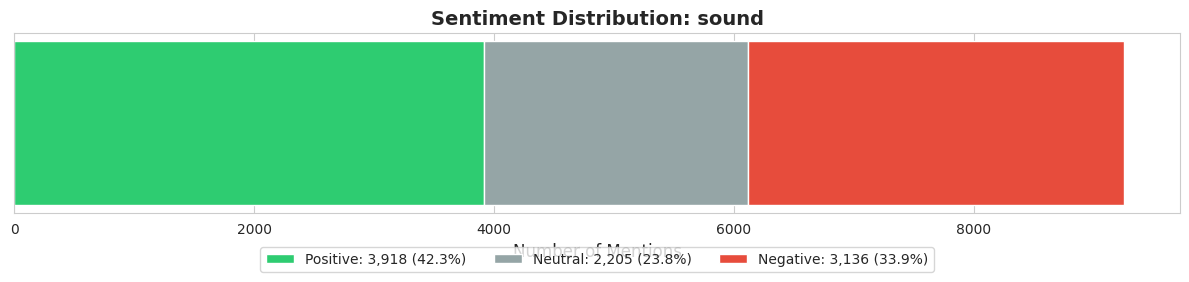


ANALYSIS: QUALITY

Total Mentions: 9,086
Unique Reviews: 8,803

Sentiment Distribution:
  Positive  :  4,602 ( 50.6%)
  Neutral   :  1,454 ( 16.0%)
  Negative  :  3,030 ( 33.3%)

Positive-to-Negative Ratio: 1.52




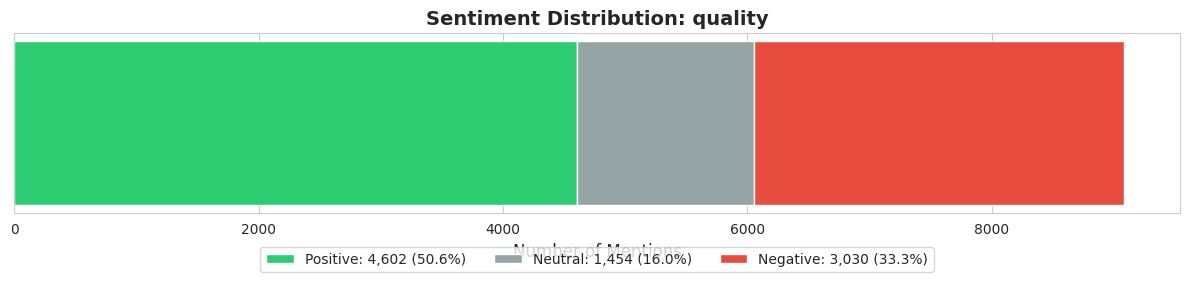


ANALYSIS: HEADPHONES

Total Mentions: 6,716
Unique Reviews: 6,046

Sentiment Distribution:
  Positive  :  2,536 ( 37.8%)
  Neutral   :  2,608 ( 38.8%)
  Negative  :  1,572 ( 23.4%)

Positive-to-Negative Ratio: 1.61




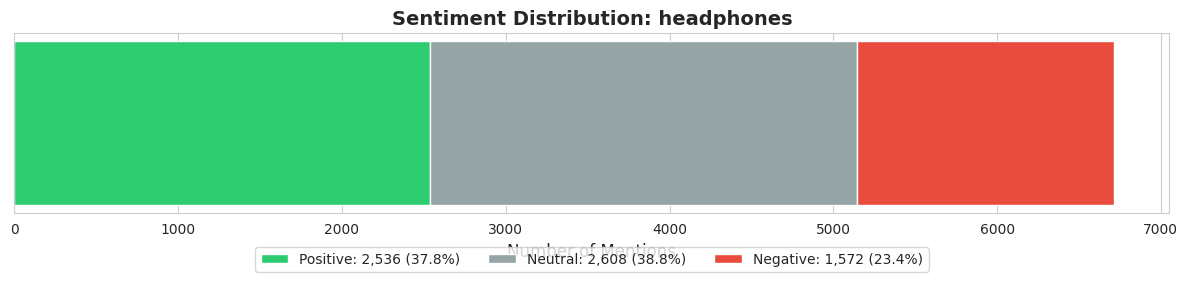


ANALYSIS: CAMERA

Total Mentions: 6,712
Unique Reviews: 6,100

Sentiment Distribution:
  Positive  :  1,953 ( 29.1%)
  Neutral   :  2,774 ( 41.3%)
  Negative  :  1,985 ( 29.6%)

Positive-to-Negative Ratio: 0.98




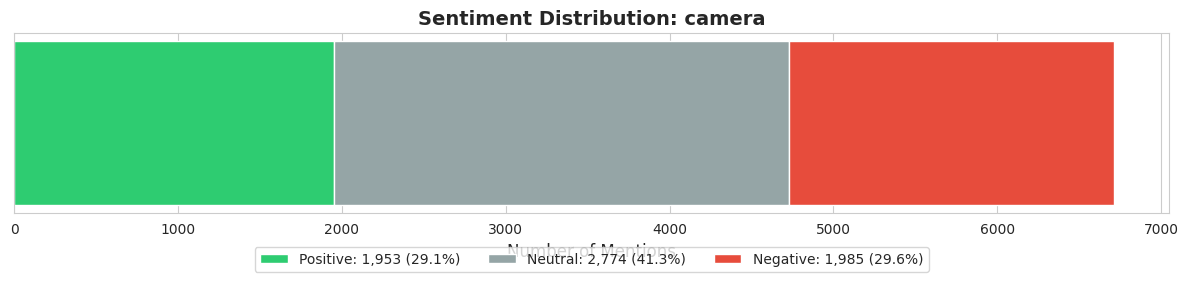


ANALYSIS: VIDEOS

Total Mentions: 6,486
Unique Reviews: 5,950

Sentiment Distribution:
  Positive  :  1,902 ( 29.3%)
  Neutral   :  3,027 ( 46.7%)
  Negative  :  1,557 ( 24.0%)

Positive-to-Negative Ratio: 1.22




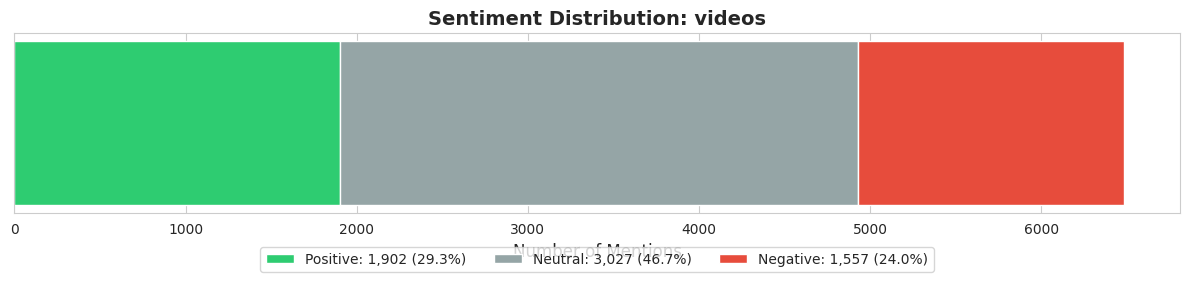


ANALYSIS: THESE HEADPHONES

Total Mentions: 6,138
Unique Reviews: 5,106

Sentiment Distribution:
  Positive  :  2,947 ( 48.0%)
  Neutral   :  1,361 ( 22.2%)
  Negative  :  1,830 ( 29.8%)

Positive-to-Negative Ratio: 1.61




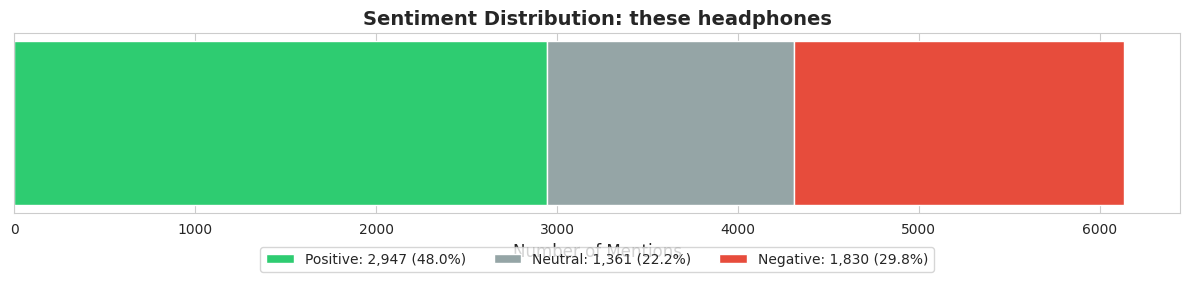


ANALYSIS: USB

Total Mentions: 5,446
Unique Reviews: 4,619

Sentiment Distribution:
  Positive  :  1,166 ( 21.4%)
  Neutral   :  3,310 ( 60.8%)
  Negative  :    970 ( 17.8%)

Positive-to-Negative Ratio: 1.20




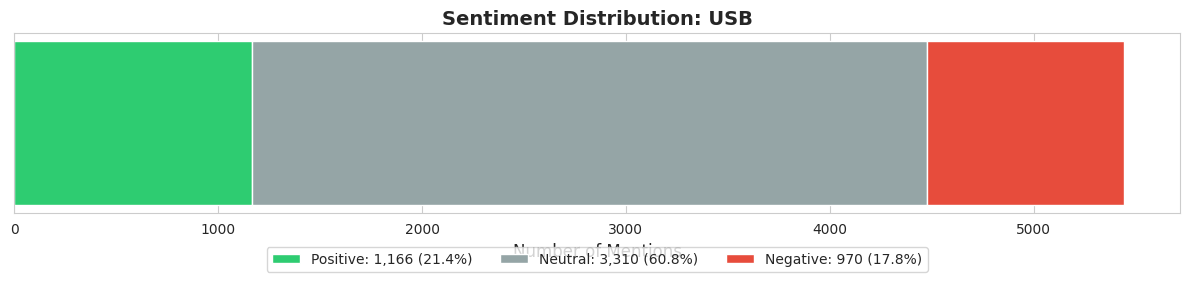


ANALYSIS: BATTERIES

Total Mentions: 5,371
Unique Reviews: 4,811

Sentiment Distribution:
  Positive  :  1,360 ( 25.3%)
  Neutral   :  2,407 ( 44.8%)
  Negative  :  1,604 ( 29.9%)

Positive-to-Negative Ratio: 0.85




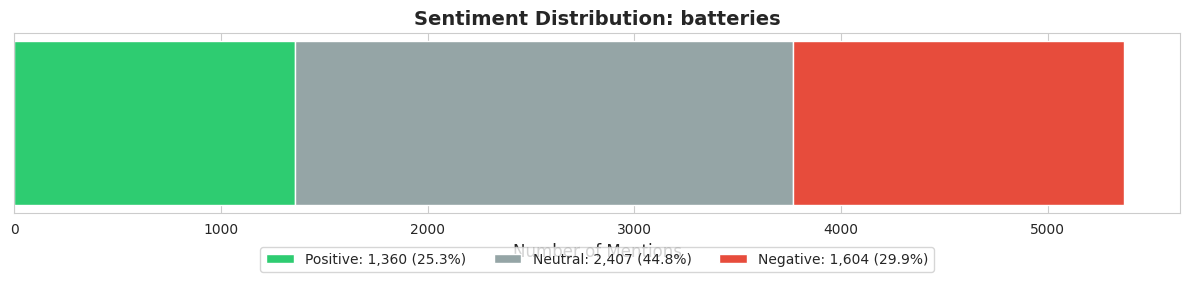


ANALYSIS: BLUETOOTH

Total Mentions: 4,919
Unique Reviews: 4,408

Sentiment Distribution:
  Positive  :  1,612 ( 32.8%)
  Neutral   :  1,912 ( 38.9%)
  Negative  :  1,395 ( 28.4%)

Positive-to-Negative Ratio: 1.16




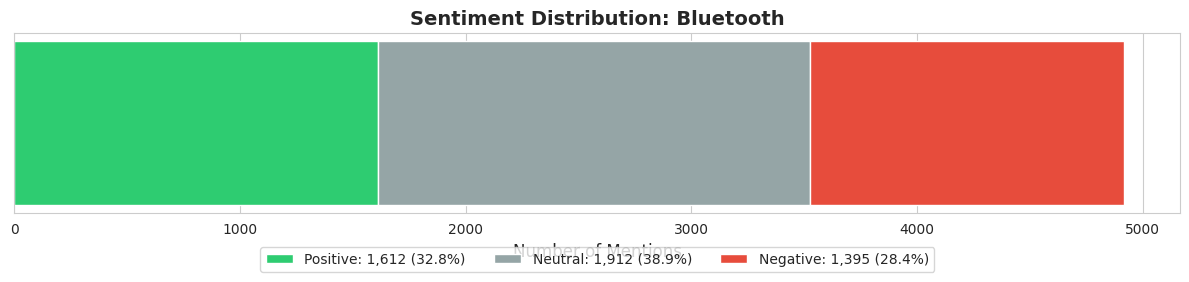


ANALYSIS: REVIEWS

Total Mentions: 4,743
Unique Reviews: 4,566

Sentiment Distribution:
  Positive  :  1,170 ( 24.7%)
  Neutral   :  2,091 ( 44.1%)
  Negative  :  1,482 ( 31.2%)

Positive-to-Negative Ratio: 0.79




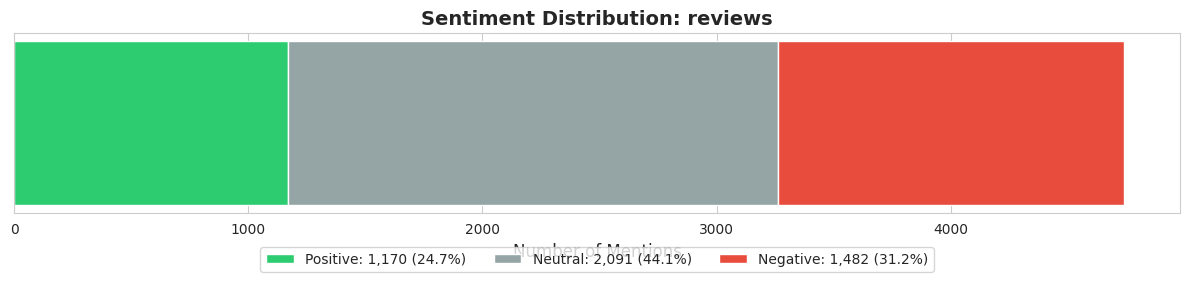

In [8]:
print("=" * 80)
print("TOP 10 ASPECTS - DETAILED ANALYSIS")
print("=" * 80)

# Get top 10 aspects
top_10_aspects = summary_df.head(10)['aspect'].tolist()

# Store results for comparison
analysis_results = []

for aspect in top_10_aspects:
    result = analyze_aspect(aspect, aspects_df, show_examples=False)
    if result:
        analysis_results.append(result)
        plot_aspect_sentiment(aspect, aspects_df)

# Compare sentiment distributions across top aspects

In [9]:
def plot_aspect_comparison(analysis_results, n=10):
    '''
    Compare sentiment percentages across multiple aspects.

    Parameters:
        analysis_results: List of analysis result dictionaries
        n: Number of aspects to display
    '''

    # Convert to DataFrame
    comparison_df = pd.DataFrame(analysis_results[:n])
    comparison_df = comparison_df.sort_values('total', ascending=True)

    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 8))

    aspects = comparison_df['aspect']
    y_pos = np.arange(len(aspects))

    # Plot bars
    colors = ['#2ecc71', '#95a5a6', '#e74c3c']
    sentiments = ['positive_pct', 'neutral_pct', 'negative_pct']
    labels = ['Positive', 'Neutral', 'Negative']

    left = np.zeros(len(aspects))

    for sentiment, label, color in zip(sentiments, labels, colors):
        values = comparison_df[sentiment].values
        ax.barh(y_pos, values, left=left, color=color, label=label)

        # Add percentage labels
        for i, (val, l) in enumerate(zip(values, left)):
            if val > 5:  # Only label if > 5%
                ax.text(l + val/2, i, f'{val:.0f}%',
                       ha='center', va='center', fontsize=9, fontweight='bold')

        left += values

    ax.set_yticks(y_pos)
    ax.set_yticklabels(aspects)
    ax.set_xlabel('Percentage', fontsize=12)
    ax.set_title(f'Sentiment Comparison: Top {n} Aspects', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_xlim(0, 100)
    plt.tight_layout()
    plt.show()

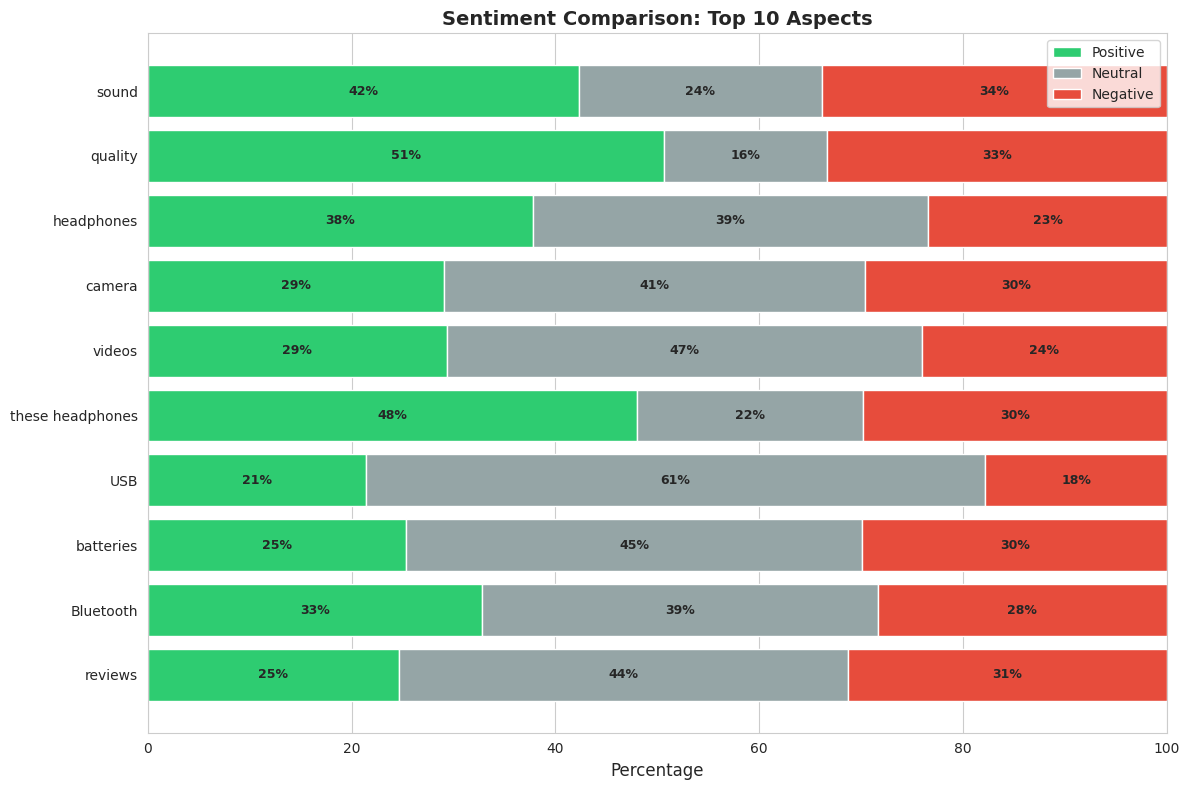

In [10]:
plot_aspect_comparison(analysis_results, n=10)

# Find aspects with high negative sentiment rates


In [11]:
def identify_problem_aspects(summary_df, min_mentions=100, neg_threshold=40):
    '''
    Identify aspects with concerning negative sentiment rates.

    Parameters:
        summary_df: Aggregated aspect statistics
        min_mentions: Minimum total mentions to consider
        neg_threshold: Minimum negative percentage to flag

    Returns:
        DataFrame: Problem aspects sorted by negative percentage
    '''

    # Filter by minimum mentions
    filtered = summary_df[summary_df['total'] >= min_mentions].copy()

    # Calculate negative percentage
    filtered['negative_pct'] = (filtered['negative'] / filtered['total']) * 100

    # Filter by negative threshold
    problems = filtered[filtered['negative_pct'] >= neg_threshold].copy()
    problems = problems.sort_values('negative_pct', ascending=False)

    return problems[['aspect', 'total', 'negative', 'positive', 'negative_pct']]

In [12]:
print("\n" + "=" * 80)
print("PROBLEM ASPECTS (>40% Negative Sentiment)")
print("=" * 80)

problem_aspects = identify_problem_aspects(summary_df, min_mentions=100, neg_threshold=40)
print(f"\nFound {len(problem_aspects)} problematic aspects:\n")
print(problem_aspects.to_string(index=False))


PROBLEM ASPECTS (>40% Negative Sentiment)

Found 177 problematic aspects:

                aspect  total  negative  positive  negative_pct
          Poor quality    595       595         0    100.000000
         Complete junk    100       100         0    100.000000
      terrible quality    125       125         0    100.000000
      Terrible quality    118       118         0    100.000000
           Bad quality    109       109         0    100.000000
     Very poor quality    181       181         0    100.000000
      Not good quality    123       123         0    100.000000
           Poor design    193       193         0    100.000000
     very poor quality    300       295         5     98.333333
    Poor sound quality    187       182         0     97.326203
          poor quality    960       929        10     96.770833
      very low quality    143       138         0     96.503497
           poor design    172       163         0     94.767442
  poor quality control    14

# Find aspects with high positive sentiment rates


In [13]:
def identify_strength_aspects(summary_df, min_mentions=100, pos_threshold=60):
    '''
    Identify aspects with strong positive sentiment rates.

    Parameters:
        summary_df: Aggregated aspect statistics
        min_mentions: Minimum total mentions to consider
        pos_threshold: Minimum positive percentage to flag

    Returns:
        DataFrame: Strength aspects sorted by positive percentage
    '''

    filtered = summary_df[summary_df['total'] >= min_mentions].copy()
    filtered['positive_pct'] = (filtered['positive'] / filtered['total']) * 100

    strengths = filtered[filtered['positive_pct'] >= pos_threshold].copy()
    strengths = strengths.sort_values('positive_pct', ascending=False)

    return strengths[['aspect', 'total', 'positive', 'negative', 'positive_pct']]

In [14]:
print("\n" + "=" * 80)
print("STRENGTH ASPECTS (>60% Positive Sentiment)")
print("=" * 80)

strength_aspects = identify_strength_aspects(summary_df, min_mentions=100, pos_threshold=60)
print(f"\nFound {len(strength_aspects)} strength aspects:\n")
print(strength_aspects.head(20).to_string(index=False))


STRENGTH ASPECTS (>60% Positive Sentiment)

Found 107 strength aspects:

               aspect  total  positive  negative  positive_pct
       Great features    110       110         0    100.000000
      Quality product    153       153         0    100.000000
         Great device    152       152         0    100.000000
         Perfect size    139       139         0    100.000000
    Very good quality    322       320         1     99.378882
         Great screen    147       146         1     99.319728
         perfect size    120       119         0     99.166667
  pretty good quality    103       102         0     99.029126
        Great quality   1090      1064        25     97.614679
    excellent quality    258       250         1     96.899225
        Great monitor    311       301        10     96.784566
    Excellent quality    346       333         7     96.242775
   Great battery life    186       179         7     96.236559
         High quality    212       203      

In [15]:
def search_aspects(query, summary_df, aspects_df):
    '''
    Search for aspects matching a query string.

    Parameters:
        query: Search term (e.g., 'batter', 'sound')
        summary_df: Aspect summary statistics
        aspects_df: Full aspect-sentiment data

    Returns:
        DataFrame: Matching aspects with statistics
    '''

    # Find matching aspects
    matches = summary_df[summary_df['aspect'].str.contains(query, case=False, na=False)]

    if len(matches) == 0:
        print(f"No aspects found matching '{query}'")
        return None

    print(f"Found {len(matches)} aspects matching '{query}':\n")
    print(matches[['aspect', 'total', 'positive', 'negative', 'neutral']].to_string(index=False))

    return matches

In [16]:
# Example searches
print("\n" + "=" * 80)
print("EXAMPLE: Search for battery-related aspects")
print("=" * 80)
search_aspects('batter', summary_df, aspects_df)

print("\n" + "=" * 80)
print("EXAMPLE: Search for sound-related aspects")
print("=" * 80)
search_aspects('sound', summary_df, aspects_df)

print("Go to 03_Disagreement_Analysis.ipynb for disagreement case analysis")


EXAMPLE: Search for battery-related aspects
Found 3115 aspects matching 'batter':

                                                                                                                            aspect  total  positive  negative  neutral
                                                                                                                         batteries   5371      1360      1604     2407
                                                                                                                           battery   3983       994      1608     1381
                                                                                                                      battery life   3339      1329      1074      936
                                                                                                                      Battery life   2755      1454       773      528
                                                                                 